In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

plt.rcParams["font.sans-serif"] = ["SimHei"]  # 用来正常显示中文标签
plt.rcParams["axes.unicode_minus"] = False  # 用来正常显示负号

In [15]:
iris = load_iris()
data = pd.DataFrame(iris.data,columns=iris.feature_names)
data['label'] = iris.target
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:

X = data[[i for i in data.columns if i!='label']]
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
83,6.0,2.7,5.1,1.6
127,6.1,3.0,4.9,1.8
62,6.0,2.2,4.0,1.0
140,6.7,3.1,5.6,2.4
9,4.9,3.1,1.5,0.1
...,...,...,...,...
106,4.9,2.5,4.5,1.7
32,5.2,4.1,1.5,0.1
65,6.7,3.1,4.4,1.4
103,6.3,2.9,5.6,1.8


# 定义模型

In [17]:
def softmax(scores):
    # 计算总和
    sum_exp = np.sum(np.exp(scores), axis=1, keepdims=True)
    softmax = np.exp(scores) / sum_exp
    return softmax


def one_hot(label_arr, n_samples, n_classes):
    one_hot = np.zeros((n_samples, n_classes))
    one_hot[np.arange(n_samples), label_arr.T] = 1
    return one_hot


def predict(test_dataset, label_arr, weights):
    scores = np.dot(test_dataset, weights.T)
    probs = softmax(scores)
    return np.argmax(probs, axis=1).reshape((-1, 1))

def train(data_arr, label_arr, n_class, iters=1000, alpha=0.1, lam=0.01):
    n_samples, n_features = data_arr.shape
    n_classes = n_class
    # 随机初始化权重矩阵
    weights = np.random.rand(n_class, n_features)
    # 定义损失结果
    all_loss = list()
    # 计算 one-hot 矩阵
    y_one_hot = one_hot(label_arr, n_samples, n_classes)
    for i in range(iters):
        # 计算 m * k 的分数矩阵
        scores = np.dot(data_arr, weights.T)
        # 计算 softmax 的值
        probs = softmax(scores)
        # 计算损失函数值
        loss = -(1.0 / n_samples) * np.sum(y_one_hot * np.log(probs))
        all_loss.append(loss)
        # 求解梯度
        dw = (
            -(1.0 / n_samples) * np.dot((y_one_hot - probs).T, data_arr) + lam * weights
        )
        dw[:, 0] = dw[:, 0] - lam * weights[:, 0]
        # 更新权重矩阵
        weights = weights - alpha * dw
    return weights, all_loss


# 训练数据

In [18]:
train_data_arr, train_label_arr = X_train, y_train
# data_arr = np.array(data_arr)
train_label_arr = np.array(train_label_arr).reshape((-1, 1))
weights, all_loss = train(train_data_arr, train_label_arr, n_class=4)
y_predict = predict(train_data_arr, train_label_arr, weights)

accuray = np.sum(y_predict == train_label_arr) / len(train_label_arr)
print("训练集准确率", accuray)


# 计算预测的准确率
test_data_arr, test_label_arr = X_test, y_test
# test_data_arr = np.array(test_data_arr)
test_label_arr = np.array(test_label_arr).reshape((-1, 1))
y_predict = predict(test_data_arr, test_label_arr, weights)
accuray = np.sum(y_predict == test_label_arr) / len(test_label_arr)
print("测试集准确率", accuray)

训练集准确率 0.9619047619047619
测试集准确率 0.9777777777777777


# 绘制损失函数

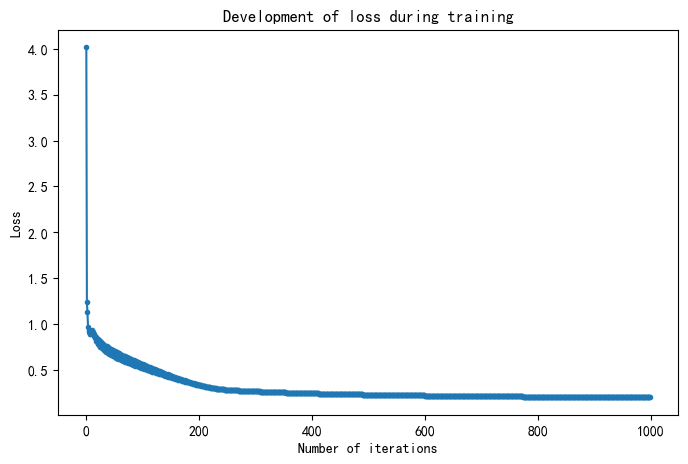

In [19]:
fig = plt.figure(figsize=(8, 5))
plt.plot(np.arange(1000), all_loss, marker=".")
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()